In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from icecream import ic
import numpy as np

In [40]:
data = pd.read_csv('../datasets/OIE_data.csv')
 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patientnumber                  305 non-null    object 
 1   malclass                       305 non-null    object 
 2   PTH                            305 non-null    int64  
 3   age                            305 non-null    int64  
 4   sex                            305 non-null    object 
 5   Ethnicity                      305 non-null    object 
 6   Groups                         295 non-null    object 
 7   Symptombeginn                  285 non-null    float64
 8   Pittingquote_absolut_modified  145 non-null    float64
 9   Pittingquote_modified          145 non-null    float64
 10  Immunity                       195 non-null    object 
 11  [iE]                           61 non-null     float64
 12  parasitemia                    61 non-null     flo

In [41]:
ic(data.columns)
data.info()

ic| data.columns: Index(['patientnumber', 'malclass', 'PTH', 'age', 'sex', 'Ethnicity', 'Groups',
                         'Symptombeginn', 'Pittingquote_absolut_modified',
                         'Pittingquote_modified', 'Immunity', '[iE]', 'parasitemia', 'PfHRP2',
                         'Hkt', '[E]', 'Hb', 'LDH', 'Hapto', 'Thrombos', 'oiE_percent', '[oiE]',
                         'R_percent', '[R]', 'RPI', 'time', 'patient_id'],
                        dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patientnumber                  305 non-null    object 
 1   malclass                       305 non-null    object 
 2   PTH                            305 non-null    int64  
 3   age                            305 non-null    int64  
 4   sex                            305 non-null    object 
 5   Ethnicity                      305 non-null    object 
 6   Groups                         295 non-null    object 
 7   Symptombeginn                  285 non-null    float64
 8   Pittingquote_absolut_modified  145 non-null    float64
 9   Pittingquote_modified          145 non-null    float64
 10  Immunity                       195 non-null    object 
 11  [iE]                           61 non-null     float64
 12  parasitemia                    61 non-null     flo

ic| np.nanmedian(data[data['PTH']==0]['parasitemia']): 0.4
ic| np.nanmedian(data[data['PTH']==1]['parasitemia']): 1.0
ic| np.nanmedian(data[data['PTH']==0]['[iE]']): 17850.0
ic| np.nanmedian(data[data['PTH']==1]['[iE]']): 57000.0


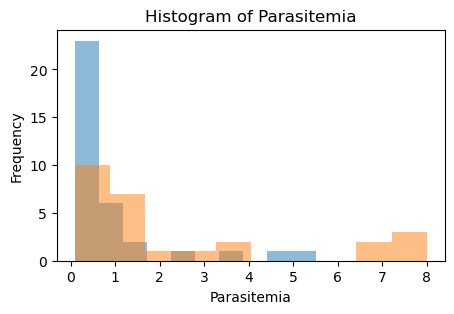

In [42]:
fig, ax = plt.subplots(figsize = (5, 3))

ax.hist(data[data['PTH']==0]['parasitemia'], bins=10, alpha=0.5, label='PTH=0')
ax.hist(data[data['PTH']==1]['parasitemia'], bins=10, alpha=0.5, label='PTH=1') 
ic(np.nanmedian(data[data['PTH']==0]['parasitemia']))
ic(np.nanmedian(data[data['PTH']==1]['parasitemia']))

ic(np.nanmedian(data[data['PTH']==0]['[iE]']))
ic(np.nanmedian(data[data['PTH']==1]['[iE]']))

ax.set_xlabel('Parasitemia')
ax.set_ylabel('Frequency')      
ax.set_title('Histogram of Parasitemia')
plt.show()  

ic| np.nanmedian(data[data['PTH']==0]['Symptombeginn']): 3.0
ic| np.nanmedian(data[data['PTH']==1]['Symptombeginn']): 5.0


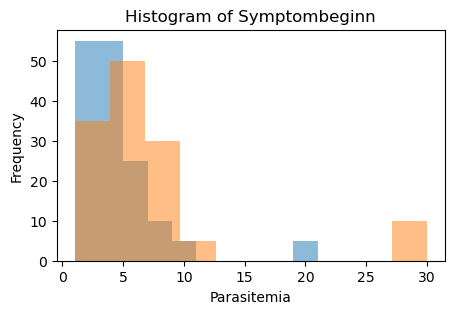

In [43]:
fig, ax = plt.subplots(figsize = (5, 3))

ax.hist(data[data['PTH']==0]['Symptombeginn'], bins=10, alpha=0.5, label='PTH=0')
ax.hist(data[data['PTH']==1]['Symptombeginn'], bins=10, alpha=0.5, label='PTH=1') 

ic(np.nanmedian(data[data['PTH']==0]['Symptombeginn']))
ic(np.nanmedian(data[data['PTH']==1]['Symptombeginn']))
ax.set_xlabel('Parasitemia')
ax.set_ylabel('Frequency')      
ax.set_title('Histogram of Symptombeginn')
plt.show()  

In [44]:
def extract_patient(data: pd.DataFrame, patient_id: int) -> pd.DataFrame:    
    patient_df = data[data['patient_id'] == patient_id] 
    return patient_df

def list_patients(data: pd.DataFrame) -> list:
    patients = data['patient_id'].unique()
    return patients

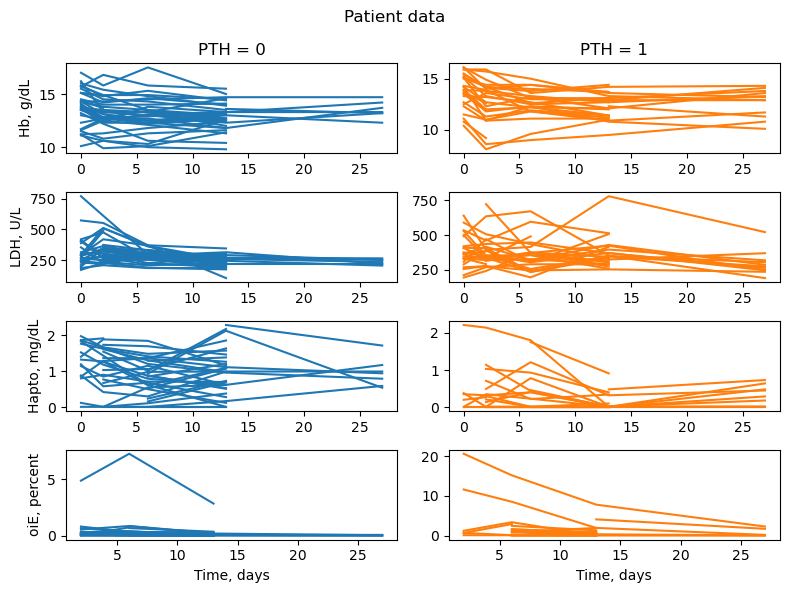

In [45]:
fig , ax = plt.subplots(4,2 , figsize = (8, 6))

for patient in list_patients(data):
    patient_df = extract_patient(data, patient)
    pth = int(patient_df['PTH'].values[0])

    color = [f'C{i}' for i in range(2)][pth]
    ax[0, pth].plot(patient_df['time'], patient_df['Hb'], label = patient, color=color)
    ax[1, pth].plot(patient_df['time'], patient_df['LDH'], label = patient, color=color)
    ax[2, pth].plot(patient_df['time'], patient_df['Hapto'], label = patient, color=color)
    ax[3, pth].plot(patient_df['time'], patient_df['oiE_percent'], label = patient, color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, g/dL')
ax[1, 0].set_ylabel('LDH, U/L')    
ax[2, 0].set_ylabel('Hapto, mg/dL')  
ax[3, 0].set_ylabel('oiE, percent')    

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')

fig.suptitle('Patient data')
plt.tight_layout()
plt.show()

## Normalize values for entire feature

Entire feature vector (e.g. Hb) is normalized over all patients and timepoints, i.e. feature difference between patient persists

In [46]:
def normalize_hb(data: pd.DataFrame):
    data['Hb_norm'] = (data['Hb'] - data['Hb'].mean()) / data['Hb'].std()
    return data

def normalize_ldh(data: pd.DataFrame):
    data['LDH_norm'] = (data['LDH'] - data['LDH'].mean()) / data['LDH'].std()
    return data 

def normalize_hapto(data: pd.DataFrame):
    data['Hapto_norm'] = (data['Hapto'] - data['Hapto'].mean()) / data['Hapto'].std()
    return data 


def normalize_oie(data: pd.DataFrame):
    data['oiE_percent_norm'] = (data['oiE_percent'] - data['oiE_percent'].mean()) / data['oiE_percent'].std()
    return data 

def normalyize_data(data: pd.DataFrame):
    data = normalize_hb(data)
    data = normalize_ldh(data)
    data = normalize_hapto(data)
    data = normalize_oie(data)  
    return data 

In [47]:
n_data = normalyize_data(data)

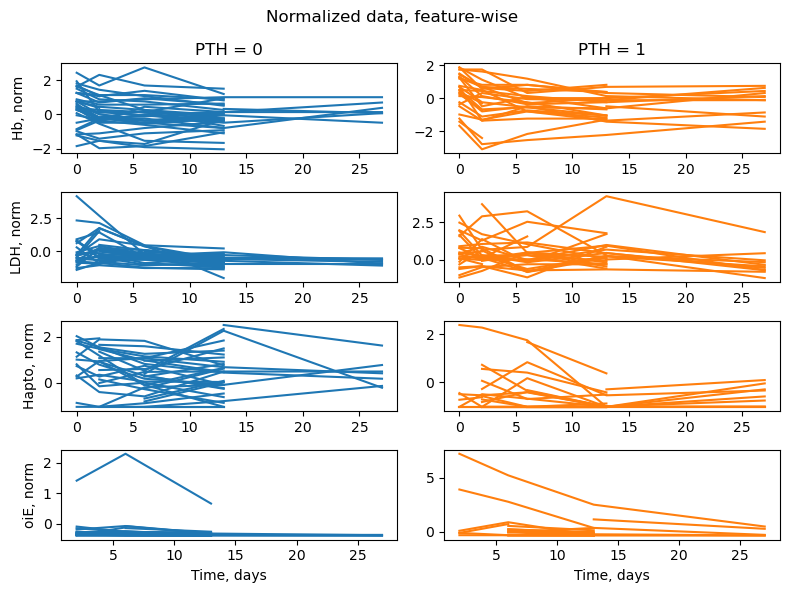

In [48]:
fig , ax = plt.subplots(4,2 , figsize = (8, 6))

for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    pth = int(patient_df['PTH'].values[0])

    color = [f'C{i}' for i in range(2)][pth]
    ax[0, pth].plot(patient_df['time'], patient_df['Hb_norm'], label = patient, color=color)
    ax[1, pth].plot(patient_df['time'], patient_df['LDH_norm'], label = patient, color=color)
    ax[2, pth].plot(patient_df['time'], patient_df['Hapto_norm'], label = patient, color=color)
    ax[3, pth].plot(patient_df['time'], patient_df['oiE_percent_norm'], label = patient, color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, norm')
ax[1, 0].set_ylabel('LDH, norm')    
ax[2, 0].set_ylabel('Hapto, norm')  
ax[3, 0].set_ylabel('oiE, norm')    

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')
fig.suptitle('Normalized data, feature-wise ')
plt.tight_layout()
plt.show()

## Normalize features per patient

Here each features is normalized for each patient/individually

In [49]:
# Define a function to calculate normalized Hb values
def calculate_normalized_feat(patient_data, feature: str):
    mean_feat = patient_data[feature].mean()
    std_feat = patient_data[feature].std()
    normalized_feat = (patient_data[feature] - mean_feat)/std_feat
    return normalized_feat

def normalize_data_ind(data: pd.DataFrame, features: list):
    for feature in features:    
        for patient in list_patients(data):
            patient_df = extract_patient(data, patient)
            data.loc[data['patient_id'] == patient, f'{feature}_norm_ind'] = calculate_normalized_feat(patient_df, feature        )
    return data

In [50]:
n_data_ind = normalize_data_ind(n_data, ['Hb', 'LDH', 'Hapto', 'oiE_percent'])

In [51]:
n_data_ind.tail()

,patientnumber,malclass,PTH,age,sex,Ethnicity,Groups,Symptombeginn,Pittingquote_absolut_modified,Pittingquote_modified,...,time,patient_id,Hb_norm,LDH_norm,Hapto_norm,oiE_percent_norm,Hb_norm_ind,LDH_norm_ind,Hapto_norm_ind,oiE_percent_norm_ind
300,S9,severe,1,19,female,Non-African,NaN,7.0,NaN,NaN,...,0,60.0,-1.667176,1.573407,NaN,NaN,0.497880,-0.317615,NaN,NaN
301,S9,severe,1,19,female,Non-African,NaN,7.0,NaN,NaN,...,2,60.0,-3.094534,2.903667,-1.033786,NaN,-1.334319,0.668205,NaN,NaN
302,S9,severe,1,19,female,Non-African,NaN,7.0,NaN,NaN,...,6,60.0,-2.163648,3.240915,-1.033786,0.526260,-0.139406,0.918132,NaN,0.707107
303,S9,severe,1,19,female,Non-African,NaN,7.0,NaN,NaN,...,13,60.0,-1.294821,0.289988,-1.033786,0.117217,0.975845,-1.268723,NaN,-0.707107
304,S9,severe,1,19,female,Non-African,NaN,7.0,NaN,NaN,...,27,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


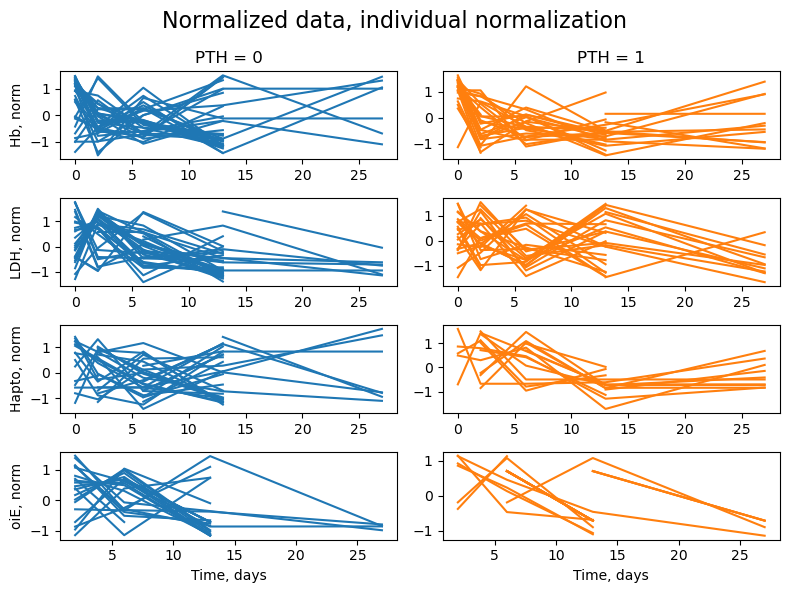

In [52]:
fig , ax = plt.subplots(4,2 , figsize = (8, 6))

for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    pth = int(patient_df['PTH'].values[0])

    color = [f'C{i}' for i in range(2)][pth]
    ax[0, pth].plot(patient_df['time'], patient_df['Hb_norm_ind'], label = patient, color=color)
    ax[1, pth].plot(patient_df['time'], patient_df['LDH_norm_ind'], label = patient, color=color)
    ax[2, pth].plot(patient_df['time'], patient_df['Hapto_norm_ind'], label = patient, color=color)
    ax[3, pth].plot(patient_df['time'], patient_df['oiE_percent_norm_ind'], label = patient, color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, norm')
ax[1, 0].set_ylabel('LDH, norm')    
ax[2, 0].set_ylabel('Hapto, norm')  
ax[3, 0].set_ylabel('oiE, norm')    

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')

fig.suptitle('Normalized data, individual normalization', fontsize=16)
plt.tight_layout()
plt.show()

## Min-max scaling per patient

In [53]:
# Define a function to calculate normalized Hb values
def calculate_minmax_feat(patient_data, feature: str):
    max_feat = patient_data[feature].max()
    min_feat = patient_data[feature].min()
    normalized_feat = (patient_data[feature] - min_feat)/(max_feat-min_feat)
    return normalized_feat

def normalize_data_minmax_ind(data: pd.DataFrame, features: list):
    for feature in features:    
        for patient in list_patients(data):
            patient_df = extract_patient(data, patient)
            data.loc[data['patient_id'] == patient, f'{feature}_minmax_ind'] = calculate_minmax_feat(patient_df, feature        )
    return data

In [54]:
n_data = normalize_data_minmax_ind(n_data, ['Hb', 'LDH', 'Hapto', 'oiE_percent'])   

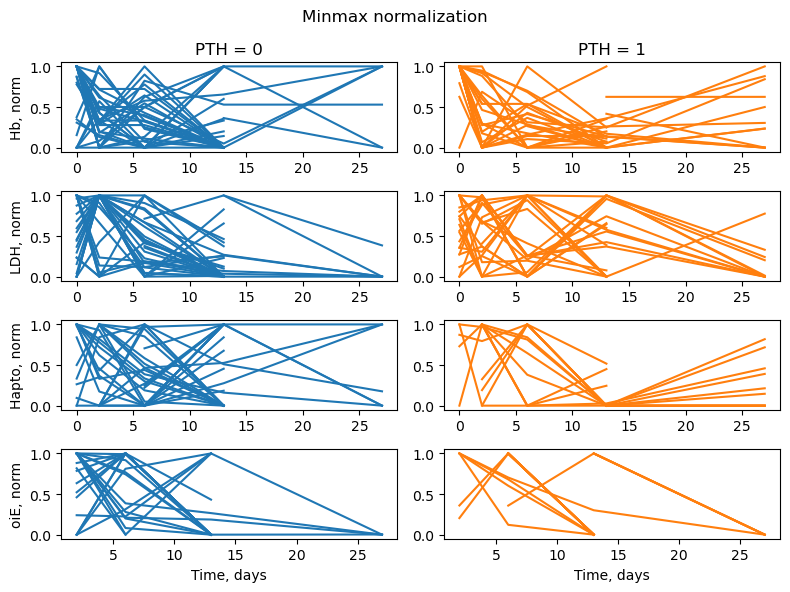

In [55]:
fig , ax = plt.subplots(4,2 , figsize = (8, 6))

for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    pth = int(patient_df['PTH'].values[0])

    color = [f'C{i}' for i in range(2)][pth]
    ax[0, pth].plot(patient_df['time'], patient_df['Hb_minmax_ind'], label = patient, color=color)
    ax[1, pth].plot(patient_df['time'], patient_df['LDH_minmax_ind'], label = patient, color=color)
    ax[2, pth].plot(patient_df['time'], patient_df['Hapto_minmax_ind'], label = patient, color=color)
    ax[3, pth].plot(patient_df['time'], patient_df['oiE_percent_minmax_ind'], label = patient, color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, norm')
ax[1, 0].set_ylabel('LDH, norm')    
ax[2, 0].set_ylabel('Hapto, norm')  
ax[3, 0].set_ylabel('oiE, norm')    

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')

fig.suptitle('Minmax normalization')
plt.tight_layout()
plt.show()

# Mead/median per feature

In [56]:
def get_stats_of_feature(data: pd.DataFrame, feature: str, pth: int = 0):
    pth_data = data[data['PTH'] == pth]
    feature_array = pth_data[feature].values
    f_reshaped = feature_array.reshape(len(feature_array)//5 , 5)

    mean_feature = np.nanmean(f_reshaped, axis=0)
    median_feature = np.nanmedian(f_reshaped, axis=0)  
    std_feature = np.nanstd(f_reshaped, axis=0)

    percentile_25, percentile_75 = np.nanpercentile(f_reshaped, [25, 75], axis=0)


    return mean_feature, median_feature, std_feature, percentile_25, percentile_75  

In [57]:
feature_list = ['Hb', 'LDH', 'Hapto', '[oiE]', 'RPI', '[E]', '[iE]', '[R]', 'Hkt']    

In [58]:
hb_pth_stats   = get_stats_of_feature(n_data, feature_list[0], pth=1) 
hb_non_pth_stats  = get_stats_of_feature(n_data, feature_list[0], pth=0) 

ldh_pth_stats = get_stats_of_feature(n_data, feature_list[1], pth=1)        
ldh_non_pth_stats = get_stats_of_feature(n_data, feature_list[1], pth=0)  

hapto_pth_stats = get_stats_of_feature(n_data, feature_list[2], pth=1)      
hapto_non_pth_stats = get_stats_of_feature(n_data, feature_list[2], pth=0)        

oie_pth_stats = get_stats_of_feature(n_data, feature_list[3], pth=1)        
oie_non_pth_stats = get_stats_of_feature(n_data, feature_list[3], pth=0)  

rpi_pth_stats = get_stats_of_feature(n_data, feature_list[4], pth=1)        
rpi_non_pth_stats = get_stats_of_feature(n_data, feature_list[4], pth=0)  

e_pth_stats = get_stats_of_feature(n_data, feature_list[5], pth=1)        
e_non_pth_stats = get_stats_of_feature(n_data, feature_list[5], pth=0)  

ie_pth_stats = get_stats_of_feature(n_data, feature_list[6], pth=1)        
ie_non_pth_stats = get_stats_of_feature(n_data, feature_list[6], pth=0)  


r_pth_stats = get_stats_of_feature(n_data, feature_list[7], pth=1)        
r_non_pth_stats = get_stats_of_feature(n_data, feature_list[7], pth=0)  

hkt_pth_stats = get_stats_of_feature(n_data, feature_list[8], pth=1)        
hkt_non_pth_stats = get_stats_of_feature(n_data, feature_list[8], pth=0)  



/tmp/ipykernel_35332/3671672377.py:6: RuntimeWarning: Mean of empty slice
  mean_feature = np.nanmean(f_reshaped, axis=0)
/tmp/ipykernel_35332/3671672377.py:7: RuntimeWarning: All-NaN slice encountered
  median_feature = np.nanmedian(f_reshaped, axis=0)
/home/nexia/miniconda3/envs/phd/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/nexia/miniconda3/envs/phd/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


In [59]:
def logistic_function(x, slope, midpoint, scale):
    """Takes slope max and midpoint.  """
    val = scale / (1 + np.exp(slope * (x - midpoint)))
    return val   

param1_TRPaging= 3.53276388 
param2_TRPaging= 5.99745537
param3_TRPaging= 0.29658879 #-0.05

rpi_calc_pth = (r_pth_stats[1] / np.nansum([r_pth_stats[1], e_pth_stats[1], ie_pth_stats[1] , oie_pth_stats[1]], axis=0)) * 100\
    * hkt_pth_stats[1] / (0.45 * logistic_function(hkt_pth_stats[1],param2_TRPaging, param3_TRPaging, param1_TRPaging))

rpi_calc_non_pth = (r_non_pth_stats[1] / np.nansum([r_non_pth_stats[1], e_non_pth_stats[1], ie_non_pth_stats[1] , oie_non_pth_stats[1]], axis=0))  * 100\
    * hkt_non_pth_stats[1] / (0.45 * logistic_function(hkt_non_pth_stats[1],param2_TRPaging, param3_TRPaging, param1_TRPaging))     



In [60]:
rpi_calc_non_pth

array([0.79943395, 0.57713103, 1.11955269, 1.26750004, 1.49324543])

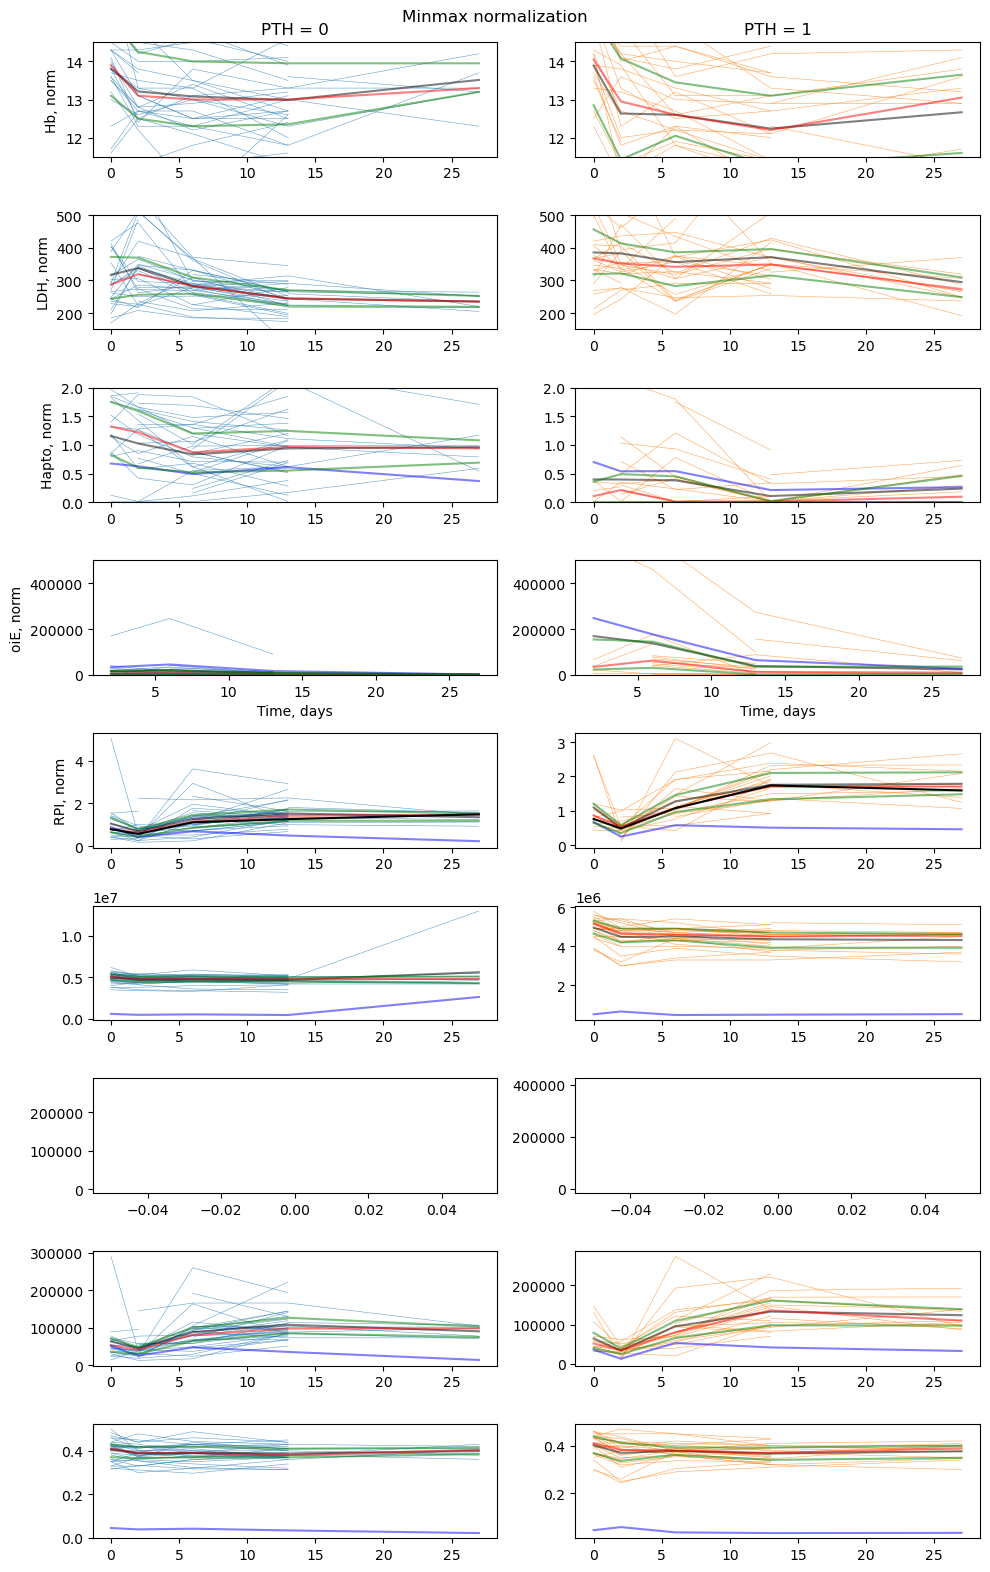

In [61]:
fig , ax = plt.subplots(9,2 , figsize = (10, 16))

for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    pth = int(patient_df['PTH'].values[0])

    color = [f'C{i}' for i in range(2)][pth]
    ax[0, pth].plot(patient_df['time'], patient_df[feature_list[0]], label = patient, color=color, alpha=0.7, lw=0.4)
    ax[1, pth].plot(patient_df['time'], patient_df[feature_list[1]], label = patient, color=color, alpha=0.7, lw=0.4)
    ax[2, pth].plot(patient_df['time'], patient_df[feature_list[2]], label = patient, color=color, alpha=0.7, lw=0.4)
    ax[3, pth].plot(patient_df['time'], patient_df[feature_list[3]], label = patient, color=color, alpha=0.7, lw=0.4)
    ax[4, pth].plot(patient_df['time'], patient_df[feature_list[4]], label = patient, color=color, alpha=0.7, lw=0.4)  
    ax[5, pth].plot(patient_df['time'], patient_df[feature_list[5]], label = patient, color=color, alpha=0.7, lw=0.4)  
    ax[6, pth].plot(patient_df['time'], patient_df[feature_list[6]], label = patient, color=color, alpha=0.7, lw=0.4)  
    ax[7, pth].plot(patient_df['time'], patient_df[feature_list[7]], label = patient, color=color, alpha=0.7, lw=0.4)  
    ax[8, pth].plot(patient_df['time'], patient_df[feature_list[8]], label = patient, color=color, alpha=0.7, lw=0.4)      


stats_order = ['mean', 'median', 'std', 'percentile_25', 'percentile_75']
color_list = ['black', 'red', 'blue', 'green', 'green']
pth_stats =  [hb_pth_stats, ldh_pth_stats, hapto_pth_stats, oie_pth_stats, rpi_pth_stats, e_pth_stats, ie_pth_stats, r_pth_stats, hkt_pth_stats]  
non_pth_stats = [hb_non_pth_stats, ldh_non_pth_stats, hapto_non_pth_stats, oie_non_pth_stats, rpi_non_pth_stats, e_non_pth_stats, ie_non_pth_stats, r_non_pth_stats, hkt_non_pth_stats] 

for i in range(len(feature_list)):
    for j in range(len(stats_order)):
        ax[i, 0].plot(patient_df['time'].unique(), non_pth_stats[i][j], label = stats_order[j], color=color_list[j], alpha=0.5)
        ax[i, 1].plot(patient_df['time'].unique(), pth_stats[i][j], label = stats_order[j], color=color_list[j], alpha=0.5)

ax[4, 0].plot(patient_df['time'].unique(), rpi_calc_non_pth, label = 'RPI_calc', color='k')
ax[4, 1].plot(patient_df['time'].unique(), rpi_calc_pth, label = 'RPI_calc', color='k')

ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, norm')
ax[1, 0].set_ylabel('LDH, norm')    
ax[2, 0].set_ylabel('Hapto, norm')  
ax[3, 0].set_ylabel('oiE, norm')  
ax[4, 0].set_ylabel('RPI, norm')    


ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')

ax[0,0].set_ylim(11.5, 14.5)
ax[0,1].set_ylim(11.5, 14.5)    

ax[1,0].set_ylim(150, 500)
ax[1,1].set_ylim(150, 500)  

ax[2,0].set_ylim(0, 2)
ax[2,1].set_ylim(0, 2)  

ax[3,0].set_ylim(0, 5e5)
ax[3,1].set_ylim(0, 5e5)      


fig.suptitle('Minmax normalization')
plt.tight_layout()
plt.show()


# Clustering

In [62]:
def extract_patient_vector(data: pd.DataFrame, patient_id: int, features:list = ['Hb_norm', 'LDH_norm', 'Hapto_norm']) -> pd.DataFrame:    
    patient_df = data[data['patient_id'] == patient_id] 
    patient_vector = patient_df[features].values.T.flatten()
    return patient_vector

def stack_p_vectors(data: pd.DataFrame, features: list = ['Hb_norm', 'LDH_norm', 'Hapto_norm', 'oiE_percent_norm']) -> np.array:
    patient_vectors = []
    for patient in list_patients(data):
        patient_vector = extract_patient_vector(data, patient, features=features)
        patient_vectors.append(patient_vector)
    patient_vectors = np.array(patient_vectors)
    return patient_vectors  

In [63]:
X = stack_p_vectors(n_data, features=['Hb_norm_ind', 'LDH_norm_ind', 'Hapto_norm_ind', 'oiE_percent_norm_ind']) 

In [64]:
X.shape

(61, 20)

In [65]:
ic('Total number of non-NaN values in X:', X.shape[0] * X.shape[1])
ic('Number of non-NaN values in X:', np.count_nonzero(~np.isnan(X)))

ic| 'Total number of non-NaN values in X:': 'Total number of non-NaN values in X:'
    X.shape[0] * X.shape[1]: 1220
ic| 'Number of non-NaN values in X:': 'Number of non-NaN values in X:'
    np.count_nonzero(~np.isnan(X)): 806


('Number of non-NaN values in X:', 806)

In [66]:
percent_nan_per_feature = np.sum(np.isnan(X), axis=0) / X.shape[0]


ic| ax.get_xticks(): array([-5.,  0.,  5., 10., 15., 20., 25.])


Text(0.5, 0, 'Time, days')

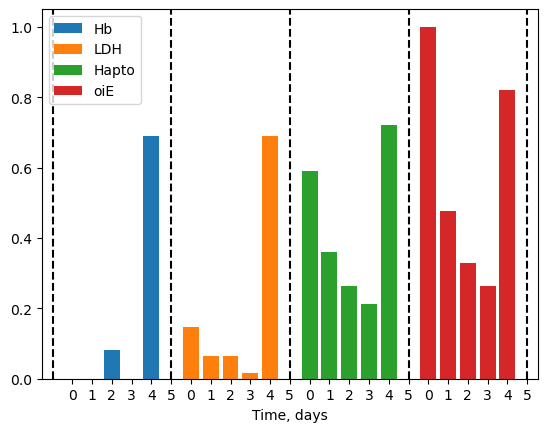

In [67]:
fig, ax =  plt.subplots()
hbs = percent_nan_per_feature[0:5]
ldhs = percent_nan_per_feature[5:10]    
haptos = percent_nan_per_feature[10:15] 
oiEs = percent_nan_per_feature[15:20]   

ax.bar(0 + np.arange(5), hbs, label = 'Hb') 
ax.bar(6 + np.arange(5), ldhs, label = 'LDH')   
ax.bar(12 + np.arange(5), haptos, label = 'Hapto')   
ax.bar(18 + np.arange(5), oiEs, label = 'oiE')   

ax.axvline(-1, color='k', linestyle='--')
ax.axvline(5, color='k', linestyle='--')
ax.axvline(11, color='k', linestyle='--')
ax.axvline(17, color='k', linestyle='--')
ax.axvline(23, color='k', linestyle='--')

ax.legend()
ic(ax.get_xticks()) 
ax.set_xticks(np.arange(0,24))
ax.set_xticklabels(np.arange(0,24)%6)
ax.set_xlabel('Time, days')

In [68]:
percent_nan_per_patient = np.sum(np.isnan(X), axis=1) / X.shape[1]  
ic(np.median(percent_nan_per_patient))
ic(np.where(percent_nan_per_patient <= np.median(percent_nan_per_patient)))
np.sum(percent_nan_per_patient <= np.median(percent_nan_per_patient))

ic| np.median(percent_nan_per_patient): 0.35
ic| np.where(percent_nan_per_patient <= np.median(percent_nan_per_patient)): (array([ 3,  6, 10, 11, 12, 13, 14, 15, 17, 18, 21, 22, 24, 25, 26, 27, 28,
                                                                                    29, 31, 32, 33, 34, 35, 38, 40, 41, 43, 44, 45, 46, 47, 49, 52, 53,
                                                                                    55, 58]),)


36

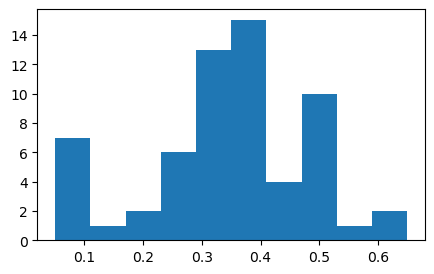

In [69]:
fig ,ax = plt.subplots(figsize = (5, 3))    

ax.hist(percent_nan_per_patient, bins=10)

plt.show()  

In [70]:
patients_to_keep = np.where(percent_nan_per_patient <= 0.35)[0] # 
X_reduced = X[patients_to_keep] 

# Use k-POD for Clustering

k-POD is Kmeans for sparse data [Here](https://arxiv.org/pdf/1411.7013.pdf).

In [71]:
# import the k_pod method
from kPOD import k_pod


In [72]:
# set the number of clusters desired (in this example, 3)
K = 2

# use previously existing data to perform clustering
clustering_results = k_pod(X_reduced, K)

# save the cluster assignments and centers
cluster_assignments = clustering_results[0]
cluster_centers = clustering_results[1]

ic(X_reduced.shape)

ic| X_reduced.shape: (36, 20)


(36, 20)

In [73]:
patients_to_keep, cluster_assignments

(array([ 3,  6, 10, 11, 12, 13, 14, 15, 17, 18, 21, 22, 24, 25, 26, 27, 28,
        29, 31, 32, 33, 34, 35, 38, 40, 41, 43, 44, 45, 46, 47, 49, 52, 53,
        55, 58]),
 array([0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
        0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 0.]))

In [74]:
cluster_assignments_full = -np.ones(len(n_data['patient_id'].unique()))
cluster_assignments_full[patients_to_keep] = cluster_assignments 
cluster_assignments_full


array([-1., -1., -1.,  0., -1., -1.,  0., -1., -1., -1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  0.,  1., -1., -1.,  1.,  0., -1.,  1.,  1.,
        0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  1.,  1., -1., -1.,  1.,
       -1.,  0.,  0., -1.,  1.,  0.,  1.,  1.,  1., -1.,  1., -1., -1.,
        1.,  1., -1.,  1., -1., -1.,  0., -1., -1.])

In [75]:
n_data['cluster'] = n_data.apply(lambda row: cluster_assignments_full[int(row['patient_id']) ], axis = 1) 

In [76]:
for p_id in list_patients(n_data):
    cluster = n_data[n_data['patient_id'] == p_id]['cluster'].values[0] 
    pth = n_data[n_data['patient_id'] == p_id]['PTH'].values[0] 
    ic(p_id, cluster, pth, cluster - pth)  


ic| p_id: 0.0, cluster: -1.0, pth: 0, cluster - pth: -1.0
ic| p_id: 1.0, cluster: -1.0, pth: 0, cluster - pth: -1.0
ic| p_id: 2.0, cluster: -1.0, pth: 1, cluster - pth: -2.0
ic| p_id: 3.0, cluster: 0.0, pth: 0, cluster - pth: 0.0
ic| p_id: 4.0, cluster: -1.0, pth: 1, cluster - pth: -2.0
ic| p_id: 5.0, cluster: -1.0, pth: 1, cluster - pth: -2.0
ic| p_id: 6.0, cluster: 0.0, pth: 0, cluster - pth: 0.0
ic| p_id: 7.0, cluster: -1.0, pth: 1, cluster - pth: -2.0
ic| p_id: 8.0, cluster: -1.0, pth: 0, cluster - pth: -1.0
ic| p_id: 9.0, cluster: -1.0, pth: 0, cluster - pth: -1.0
ic| p_id: 10.0, cluster: 1.0, pth: 1, cluster - pth: 0.0
ic| p_id: 11.0, cluster: 1.0, pth: 1, cluster - pth: 0.0
ic| p_id: 12.0, cluster: 1.0, pth: 1, cluster - pth: 0.0
ic| p_id: 13.0, cluster: 1.0, pth: 0, cluster - pth: 1.0
ic| p_id: 14.0, cluster: 1.0, pth: 0, cluster - pth: 1.0
ic| p_id: 15.0, cluster: 1.0, pth: 1, cluster - pth: 0.0
ic| p_id: 16.0, cluster: -1.0, pth: 0, cluster - pth: -1.0
ic| p_id: 17.0, cluster

In [77]:
data.columns

Index(['patientnumber', 'malclass', 'PTH', 'age', 'sex', 'Ethnicity', 'Groups',
       'Symptombeginn', 'Pittingquote_absolut_modified',
       'Pittingquote_modified', 'Immunity', '[iE]', 'parasitemia', 'PfHRP2',
       'Hkt', '[E]', 'Hb', 'LDH', 'Hapto', 'Thrombos', 'oiE_percent', '[oiE]',
       'R_percent', '[R]', 'RPI', 'time', 'patient_id', 'Hb_norm', 'LDH_norm',
       'Hapto_norm', 'oiE_percent_norm', 'Hb_norm_ind', 'LDH_norm_ind',
       'Hapto_norm_ind', 'oiE_percent_norm_ind', 'Hb_minmax_ind',
       'LDH_minmax_ind', 'Hapto_minmax_ind', 'oiE_percent_minmax_ind',
       'cluster'],
      dtype='object')

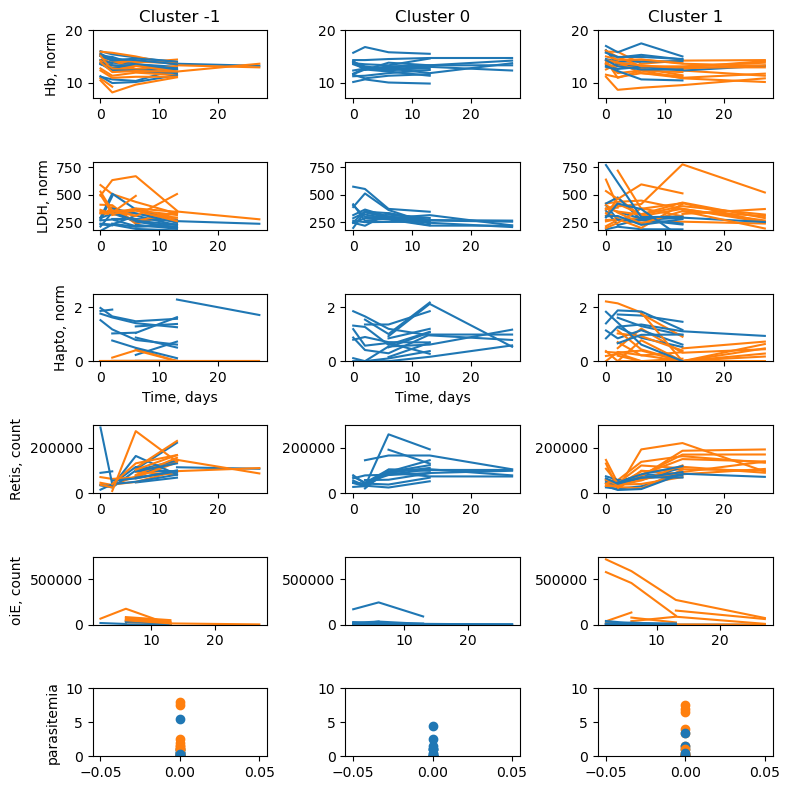

In [78]:
fig , ax = plt.subplots(6,K+1 , figsize = (4*K, 8))

for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    cluster = int(patient_df['cluster'].values[0])
    pth = int(patient_df['PTH'].values[0])

    col = cluster + 1

    color = [f'C{i}' for i in range(K)][pth]
    ax[0,col].plot(patient_df['time'], patient_df['Hb'], label = patient, color=color)
    ax[1,col].plot(patient_df['time'], patient_df['LDH'], label = patient, color=color)
    ax[2,col].plot(patient_df['time'], patient_df['Hapto'], label = patient, color=color)
    ax[3,col].plot(patient_df['time'], patient_df['[R]'], label = patient, color=color)
    ax[4,col].plot(patient_df['time'], patient_df['[oiE]'], label = patient, color=color)
    ax[5,col].scatter(patient_df['time'], patient_df['parasitemia'], label = patient, color=color)

    ax[0,col].set_ylim(7, 20)
    ax[1,col].set_ylim(180, 800)
    ax[2,col].set_ylim(0, 2.5)
    ax[3,col].set_ylim(0, 3e5)
    ax[4,col].set_ylim(0, 7.5e5)
    ax[5, col].set_ylim(0, 10)

    ax[0, col].set_title(f'Cluster {cluster}')


ax[2, 0].set_xlabel('Time, days')  
ax[2, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, norm')
ax[1, 0].set_ylabel('LDH, norm')    
ax[2, 0].set_ylabel('Hapto, norm') 
ax[3, 0].set_ylabel('Retis, count')
ax[4, 0].set_ylabel('oiE, count')    
ax[5, 0].set_ylabel('parasitemia')    

plt.tight_layout()
plt.show()

In [79]:
def plot_patient(data: pd.DataFrame, patient_id: int, features:list = ['Hb_norm', 'LDH_norm', 'Hapto_norm']):
    patient_df = extract_patient(data, patient_id)
    fig , ax = plt.subplots(len(features),1 , figsize = (5, 3))
    for i, feature in enumerate(features):
        ax[i].plot(patient_df['time'], patient_df[feature], label = feature)
        ax[i].set_ylabel(feature)
    ax[len(features) - 1].set_xlabel('Time, days')      
   
    plt.tight_layout()
    plt.show()  

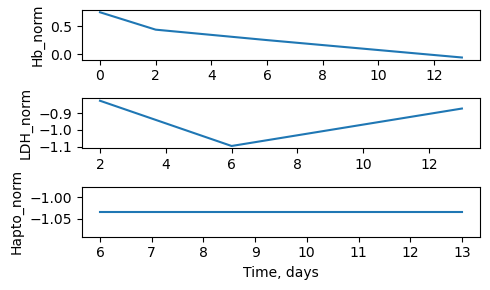

In [80]:
plot_patient(n_data, 1) 

In [81]:
n_data_drop = n_data.dropna(inplace=False)

In [82]:
n_data_drop

,patientnumber,malclass,PTH,age,sex,Ethnicity,Groups,Symptombeginn,Pittingquote_absolut_modified,Pittingquote_modified,...,oiE_percent_norm,Hb_norm_ind,LDH_norm_ind,Hapto_norm_ind,oiE_percent_norm_ind,Hb_minmax_ind,LDH_minmax_ind,Hapto_minmax_ind,oiE_percent_minmax_ind,cluster
